# jitcsim tutorial
### SDE

Simulation of the Kuramoto model with noise.
The control parameter of the model is coupling.
The initial phase also could be changed in repeated simulations.
The output is plotting the Kuramoto order parameter vs time.

In [6]:
import numpy as np
from numpy import pi
import networkx as nx
from random import randint
from numpy.random import uniform, normal
from jitcsim.visualization import plot_order
from jitcsim.models.kuramoto_sde import Kuramoto_II

In [7]:
np.random.seed(2)

N = 30
alpha0 = 0.0
sigma0 = 0.05
coupling0 = 0.5 / (N - 1)
omega0 = normal(0, 0.1, N)
initial_state = uniform(-pi, pi, N)
adj = nx.to_numpy_array(nx.complete_graph(N), dtype=int)

parameters = {
    'N': N,                             # number of nodes
    'adj': adj,                         # adjacency matrix
    't_initial': 0.,                    # initial time of integration
    "t_final": 100,                     # final time of integration
    't_transition': 2.0,                # transition time
    "interval": 1.0,                    # time interval for sampling

    "sigma": sigma0,                    # noise amplitude (normal distribution)
    "alpha": alpha0,                    # frustration
    "omega": omega0,                    # initial angular frequencies
    'initial_state': initial_state,     # initial phase of oscillators

    'control': ['coupling'],            # control parameters

    "use_omp": False,                   # use OpenMP
    "output": "data",                   # output directory
}

In [10]:
parameters["modulename"] = "km"+str(randint(1,1000))
# make an instance of the model
sol = Kuramoto_II(parameters)
# compile the model
sol.compile()

compiled C code


Using default integration parameters.


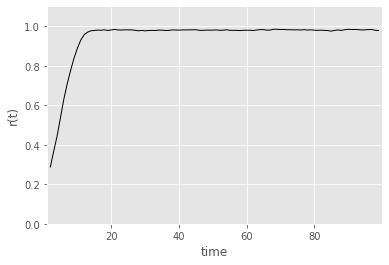

In [11]:
# run the simulation by setting the control parameters
controls = [coupling0]
data = sol.simulate(controls)
x = data['x']
t = data['t']

# calculate the Kuramoto order parameter
order = sol.order_parameter(x)

# plot order parameter vs time
plot_order(t,
           order,
           filename="data/01_sde.png",
           xlabel="time", 
           ylabel="r(t)", 
           close_fig=False)
